In [1]:
import random
import numpy as np

from keyrover.datasets.multiclass_dataset import *
from keyrover import *

from ultralytics import YOLO

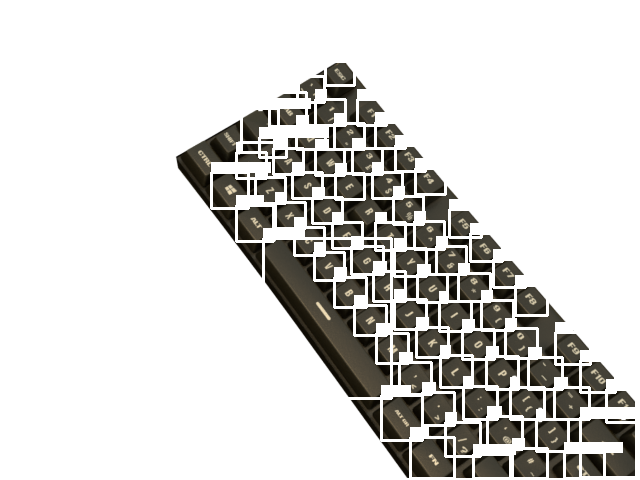

In [2]:
paths = os.listdir(f"{YOLO_MULTI_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_MULTI_DATASET}/train/images/{i.removesuffix('.txt')}.jpg")
img = np.array(img)

with open(f"{YOLO_MULTI_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

for line in lines:
    key, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)
    
    key = int(key) + 1
    text = id_to_key.get(key, str(key))
    draw_textbox(img, (x1, y1), (x1 + w, y1 + h), text, (255, 255, 255, 255), scale=1, thickness=0.25, size=0.4)

Image.fromarray(img)

In [25]:
id_to_key.values()

dict_values(['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P', '[', ']', 'space', 'lcontrol', 'up', 'left', 'down', 'right', 'delete', 'end', 'pg down', 'insert', 'home', 'pg up', 'print', 'lock', 'pause', 'backspace', 'rshift', 'rcontrol', 'menu', 'fn', 'ralt', 'lalt', 'windows', 'control', 'lshift', 'caps lock', 'ltab', 'esc', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', '`', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', '+', '|', 'Z', 'X', 'C', 'V', 'B', 'N', 'M', '<', '>', '?', 'A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L', ';', '@', '#'])

In [ ]:
model = YOLO("yolo11n.pt")

results = model.train(data=f"{YOLO_MULTI_DATASET}/data.yaml", time=7.5, patience=10, batch=32, fraction=0.25,
                      single_cls=False,
                      cache=True, verbose=True, device="mps", plots=True, project="models/yolo-multiclass")

New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=datasets/yolo-multiclass/data.yaml, epochs=100, time=7.5, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=mps, workers=8, project=models/yolo-multiclass, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.25, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/labels... 872 images, 0 backgrounds, 1 corrupt: 100%|██████████| 872/872 [00:03<00:00, 226.74it/s]

train: WARNING ⚠️ /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/images/1689.jpg: ignoring corrupt image/label: Label class 95 exceeds dataset class count 88. Possible class labels are 0-87


train: New cache created: /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.7GB RAM): 100%|██████████| 871/871 [00:00<00:00, 2637.92it/s]
val: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/valid/labels... 410 images, 0 backgrounds, 0 corrupt: 100%|██████████| 410/410 [00:01<00:00, 254.80it/s]

val: New cache created: /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.4GB RAM): 100%|██████████| 410/410 [00:00<00:00, 2471.94it/s]

Plotting labels to models/yolo-multiclass/train19/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000109, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to models/yolo-multiclass/train19
Starting training for 7.5 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      31.3G      1.785      5.692      1.371        559        640: 100%|██████████| 28/28 [01:34<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:06<00:00,  9.51s/it]

                   all        410      22704          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]